# part 1 Data Acqisition

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import scipy as sc
import statsmodels.formula.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def GetHtmlInfo(HtmlName):
    # we tell BeautifulSoup and tell it which parser to use
    soup = BeautifulSoup(open(HtmlName), "html.parser")
    # the output corresponds exactly to the html file
    title = soup.find_all(class_ = "storylink")
    titleNp = pd.Series(title, name = "title")

    tbody = soup.find_all("tbody")
    tableRows = tbody[2].find_all("tr")
    totalArray = []

    for TR in range(0, len(tableRows)-2,3):
        rowArray = []

        tempPoints = 0
        tempComments = 0
        tempTime = 0

        
        tempRank = float(tableRows[TR].find(class_ = "rank").get_text())
        title = tableRows[TR].find(class_ = "storylink").get_text()
        rawScoreString = (tableRows[TR+1].find(class_ = "subtext"))
        rawScoreString = (rawScoreString.find(class_ = "score"))
        
        if (rawScoreString) is not None:
            arrayScore = (rawScoreString.get_text()).split()
            tempPoints = float(arrayScore[0])
            
        tempTitleLength = len(title)

        atags = tableRows[TR+1].find_all('a')
        for a in atags:
            arrayItem = a.get_text().split()
            if(len(arrayItem) > 1):
                if(arrayItem[1] == "comments" or arrayItem[1] == "comment"):
                    tempComments = float(arrayItem[0])
                elif(arrayItem[1] == "hours" or arrayItem[1] == "hour"):
                    tempTime = float(arrayItem[0])

                elif(arrayItem[1] == "minutes" or arrayItem[1] == "minute"):
                    tempTime = (float(arrayItem[0])/60)

                elif(arrayItem[1] == "days" or arrayItem[1] == "day"):
                    tempTime = (float(arrayItem[0])*24)
        rowArray.append(tempRank)
        rowArray.append(tempTitleLength)
        rowArray.append(tempTime)
        rowArray.append(tempPoints)
        rowArray.append(tempComments)
        totalArray.append(rowArray)
    return totalArray

array1 = GetHtmlInfo("HackerNews1.html")
array2 = GetHtmlInfo("HackerNews2.html")
array3 = GetHtmlInfo("HackerNews3.html")
array4 = GetHtmlInfo("HackerNews4.html")
array5 = GetHtmlInfo("HackerNews5.html")
bigArray = [array1,array2,array3,array4,array5]

data1 = pd.DataFrame(data = array1, columns= ["Rank", "TitleLength", "Age", "Points", "Comments"])
data2 = pd.DataFrame(data = array2, columns= ["Rank", "TitleLength", "Age", "Points", "Comments"])
data3 = pd.DataFrame(data = array3, columns= ["Rank", "TitleLength", "Age", "Points", "Comments"])
data4 = pd.DataFrame(data = array4, columns= ["Rank", "TitleLength", "Age", "Points", "Comments"])
data5 = pd.DataFrame(data = array5, columns= ["Rank", "TitleLength", "Age", "Points", "Comments"])
frames = [data1,data2,data3,data4,data5]
mainData = pd.concat(frames)
mainData

mainData.to_csv('mainData.csv')

# Part 2 Regression

In [2]:
def rankScatterPlot(secondCol):
    plt.scatter(mainData['Rank'],mainData[secondCol],color='black',linewidth=1)
    plt.xlabel('Rank'); plt.ylabel(secondCol)
    plt.show()

In [3]:
def rSqMaker(firstCol,secondCol):
    mr1 = sm.ols(formula=f"{firstCol} ~ {secondCol}", data=mainData).fit()
    par1 = dict(mr1.params)
    mr2 = sm.ols(formula=f"{firstCol} ~ {secondCol} + I({secondCol} ** 2.0)", data=mainData).fit()
    par2 = dict(mr2.params)
    mr3 = sm.ols(formula=f"{firstCol} ~ {secondCol} + I({secondCol} ** 2.0) + I({secondCol} ** 3.0)", data=mainData).fit()
    par3 = dict(mr3.params)
    mr4 = sm.ols(formula=f"{firstCol} ~ {secondCol} + I({secondCol} ** 2.0) + I({secondCol} ** 3.0) + I({secondCol} ** 4.0)", data=mainData).fit()
    par4 = dict(mr4.params)
#     mr5 = sm.ols(formula=f"Rank ~ {secondCol} + I({secondCol} ** -1.0)", data=mainData).fit()
#     par5 = dict(mr5.params)
    
    return mr1,mr2,mr3,mr4


### Gathering data and displaying scatter plots for rank vs the other variables 

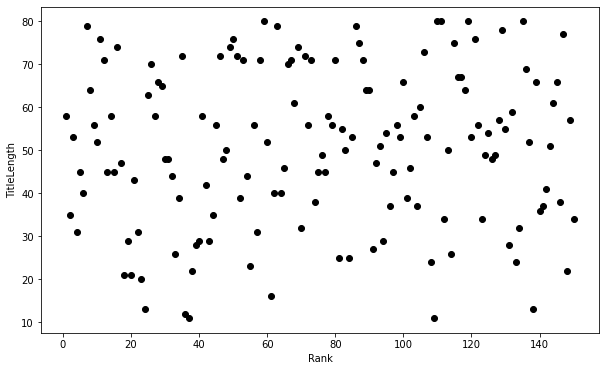

mr1: 0.005788226647859385
mr2: 0.006048994295714372
mr3: 0.007094957070338248
mr4: 0.009513084528721572


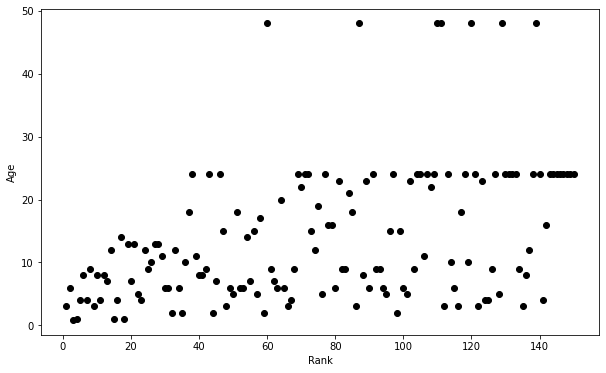

mr1: 0.19382457668305286
mr2: 0.2159834101421163
mr3: 0.24617610132601375
mr4: 0.2829902794806004


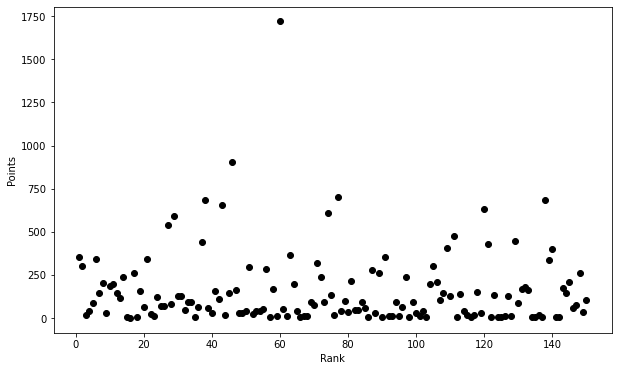

mr1: 0.003511687473822911
mr2: 0.0037643074287014855
mr3: 0.0059041594965236754
mr4: 0.01562570937664387


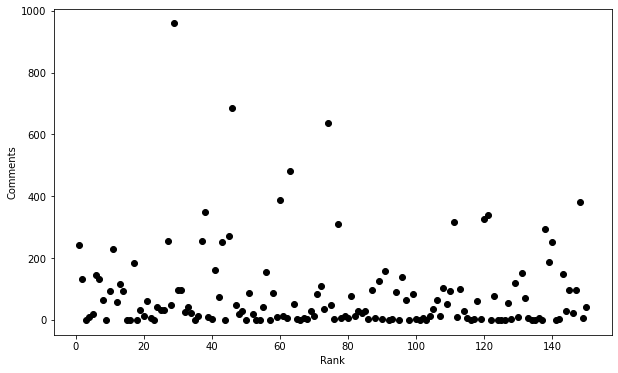

mr1: 0.00628459945526727
mr2: 0.007294462288448655
mr3: 0.01636854040323421
mr4: 0.023303321622191175


In [4]:
rankScatterPlot('TitleLength')
titleArray = rSqMaker('Rank','TitleLength')
print('mr1:',titleArray[0].rsquared)
print('mr2:',titleArray[1].rsquared)
print('mr3:',titleArray[2].rsquared)
print('mr4:',titleArray[3].rsquared)
# print('mr5:',titleArray[4].rsquared)

rankScatterPlot('Age')
AgeArray = rSqMaker('Rank','Age')
print('mr1:',AgeArray[0].rsquared)
print('mr2:',AgeArray[1].rsquared)
print('mr3:',AgeArray[2].rsquared)
print('mr4:',AgeArray[3].rsquared)
# print('mr5:',AgeArray[4].rsquared)

rankScatterPlot('Points')
PointsArray = rSqMaker('Rank','Points')
print('mr1:',PointsArray[0].rsquared)
print('mr2:',PointsArray[1].rsquared)
print('mr3:',PointsArray[2].rsquared)
print('mr4:',PointsArray[3].rsquared)
# print('mr5:',PointsArray[4].rsquared)

rankScatterPlot('Comments')
CommentsArray = rSqMaker('Rank','Comments')
print('mr1:',CommentsArray[0].rsquared)
print('mr2:',CommentsArray[1].rsquared)
print('mr3:',CommentsArray[2].rsquared)
print('mr4:',CommentsArray[3].rsquared)
# print('mr5:',CommentsArray[4].rsquared)

#### Rank vs titleLength

In [5]:
for x in range(0,4):
    print(f'mr{x+1} infomation: ')
    display(titleArray[x].summary())

mr1 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8616
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.355
Time:                        17:40:51   Log-Likelihood:                -777.63
No. Observations:                 150   AIC:                             1559.
Df Residuals:                     148   BIC:                             1565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      66.3514     10.475      6.334      0.000      45.651      87.052
TitleLength     0.1811      0.195      0.928      0.355      -0.204       0.567
==============================================================================
Omnibus:                       49.411   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.388
Skew:                           0.014   Prob(JB):                       0.0151
Kurtosis:                       1.842   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

mr2 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4473
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.640
Time:                        17:40:51   Log-Likelihood:                -777.61
No. Observations:                 150   AIC:                             1561.
Df Residuals:                     147   BIC:                             1570.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                62.2956     23.173      2.688      0.008      16.501     108.090
TitleLength               0.3760      1.012      0.372      0.711      -1.624       2.376
I(TitleLength ** 2.0)    -0.0020      0.010     -0.196      0.845      -0.022       0.018
==============================================================================
Omnibus:                       47.920   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.297
Skew:                           0.013   Prob(JB):                       0.0158
Kurtosis:                       1.848   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

mr3 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3478
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.791
Time:                        17:40:51   Log-Likelihood:                -777.53
No. Observations:                 150   AIC:                             1563.
Df Residuals:                     146   BIC:                             1575.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                46.6250     46.225      1.009      0.315     -44.731     137.981
TitleLength               1.6886      3.497      0.483      0.630      -5.224       8.601
I(TitleLength ** 2.0)    -0.0331      0.080     -0.414      0.679      -0.191       0.125
I(TitleLength ** 3.0)     0.0002      0.001      0.392      0.696      -0.001       0.001
==============================================================================
Omnibus:                       46.976   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.238
Skew:                           0.011   Prob(JB):                       0.0163
Kurtosis:                       1.852   Cond. No.                     3.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

mr4 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.3482
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.845
Time:                        17:40:51   Log-Likelihood:                -777.35
No. Observations:                 150   AIC:                             1565.
Df Residuals:                     145   BIC:                             1580.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                90.0538     86.453      1.042      0.299     -80.817     260.925
TitleLength              -3.6772      9.676     -0.380      0.704     -22.801      15.447
I(TitleLength ** 2.0)     0.1796      0.366      0.490      0.625      -0.545       0.904
I(TitleLength ** 3.0)    -0.0031      0.006     -0.553      0.581      -0.014       0.008
I(TitleLength ** 4.0)  1.814e-05   3.05e-05      0.595      0.553   -4.21e-05    7.84e-05
==============================================================================
Omnibus:                       41.971   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.907
Skew:                           0.011   Prob(JB):                       0.0192
Kurtosis:                       1.875   Cond. No.                     4.03e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Rank vs Age

In [6]:
for x in range(0,4):
    print(f'mr{x+1} infomation: ')
    display(AgeArray[x].summary())

mr1 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     35.58
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           1.73e-08
Time:                        17:40:51   Log-Likelihood:                -761.91
No. Observations:                 150   AIC:                             1528.
Df Residuals:                     148   BIC:                             1534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.9157      5.215      9.763      0.000      40.610      61.222
Age            1.7595      0.295      5.965      0.000       1.177       2.342
==============================================================================
Omnibus:                       32.687   Durbin-Watson:                   0.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.016
Skew:                           0.193   Prob(JB):                       0.0182
Kurtosis:                       1.936   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

mr2 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     20.25
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           1.71e-08
Time:                        17:40:51   Log-Likelihood:                -759.82
No. Observations:                 150   AIC:                             1526.
Df Residuals:                     147   BIC:                             1535.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        40.4381      7.284      5.552      0.000      26.044      54.833
Age               3.3421      0.829      4.029      0.000       1.703       4.981
I(Age ** 2.0)    -0.0372      0.018     -2.038      0.043      -0.073      -0.001
==============================================================================
Omnibus:                       19.150   Durbin-Watson:                   0.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.817
Skew:                           0.234   Prob(JB):                       0.0331
Kurtosis:                       2.066   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

mr3 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     15.89
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           5.39e-09
Time:                        17:40:51   Log-Likelihood:                -756.87
No. Observations:                 150   AIC:                             1522.
Df Residuals:                     146   BIC:                             1534.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        63.6944     11.994      5.311      0.000      39.991      87.398
Age              -2.9124      2.712     -1.074      0.285      -8.272       2.448
I(Age ** 2.0)     0.3132      0.146      2.145      0.034       0.025       0.602
I(Age ** 3.0)    -0.0049      0.002     -2.418      0.017      -0.009      -0.001
==============================================================================
Omnibus:                       15.804   Durbin-Watson:                   0.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.392
Skew:                           0.245   Prob(JB):                       0.0409
Kurtosis:                       2.116   Cond. No.                     9.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

mr4 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     14.31
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           7.22e-10
Time:                        17:40:51   Log-Likelihood:                -753.11
No. Observations:                 150   AIC:                             1516.
Df Residuals:                     145   BIC:                             1531.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        26.9577     17.862      1.509      0.133      -8.346      62.261
Age              14.2214      6.817      2.086      0.039       0.747      27.696
I(Age ** 2.0)    -1.7476      0.769     -2.274      0.024      -3.267      -0.228
I(Age ** 3.0)     0.0777      0.030      2.563      0.011       0.018       0.138
I(Age ** 4.0)    -0.0010      0.000     -2.729      0.007      -0.002      -0.000
==============================================================================
Omnibus:                        7.769   Durbin-Watson:                   0.556
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                4.369
Skew:                           0.219   Prob(JB):                        0.113
Kurtosis:                       2.287   Cond. No.                     7.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Rank vs Points

In [7]:
for x in range(0,4):
    print(f'mr{x+1} infomation: ')
    display(PointsArray[x].summary())

mr1 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5216
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.471
Time:                        17:40:51   Log-Likelihood:                -777.80
No. Observations:                 150   AIC:                             1560.
Df Residuals:                     148   BIC:                             1566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.3811      4.406     17.565      0.000      68.675      86.087
Points        -0.0118      0.016     -0.722      0.471      -0.044       0.021
==============================================================================
Omnibus:                       57.098   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.805
Skew:                          -0.004   Prob(JB):                       0.0122
Kurtosis:                       1.813   Cond. No.                         333.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

mr2 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2777
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.758
Time:                        17:40:51   Log-Likelihood:                -777.78
No. Observations:                 150   AIC:                             1562.
Df Residuals:                     147   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           77.8626      5.075     15.342      0.000      67.833      87.892
Points              -0.0172      0.032     -0.533      0.595      -0.081       0.047
I(Points ** 2.0)  5.128e-06   2.66e-05      0.193      0.847   -4.74e-05    5.76e-05
==============================================================================
Omnibus:                       56.664   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.783
Skew:                           0.002   Prob(JB):                       0.0124
Kurtosis:                       1.815   Cond. No.                     3.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

mr3 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.2890
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.833
Time:                        17:40:51   Log-Likelihood:                -777.62
No. Observations:                 150   AIC:                             1563.
Df Residuals:                     146   BIC:                             1575.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           79.6547      6.008     13.258      0.000      67.781      91.529
Points              -0.0529      0.071     -0.741      0.460      -0.194       0.088
I(Points ** 2.0)  9.265e-05      0.000      0.585      0.559      -0.000       0.000
I(Points ** 3.0) -4.039e-08    7.2e-08     -0.561      0.576   -1.83e-07    1.02e-07
==============================================================================
Omnibus:                       58.854   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.900
Skew:                           0.017   Prob(JB):                       0.0117
Kurtosis:                       1.807   Cond. No.                     7.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

mr4 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.5754
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.681
Time:                        17:40:51   Log-Likelihood:                -776.88
No. Observations:                 150   AIC:                             1564.
Df Residuals:                     145   BIC:                             1579.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           83.4953      6.804     12.272      0.000      70.048      96.942
Points              -0.1840      0.131     -1.408      0.161      -0.442       0.074
I(Points ** 2.0)     0.0008      0.001      1.311      0.192      -0.000       0.002
I(Points ** 3.0) -9.845e-07   7.92e-07     -1.243      0.216   -2.55e-06    5.81e-07
I(Points ** 4.0)  3.492e-10   2.92e-10      1.197      0.233   -2.28e-10    9.26e-10
==============================================================================
Omnibus:                       44.780   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.098
Skew:                           0.013   Prob(JB):                       0.0174
Kurtosis:                       1.862   Cond. No.                     1.37e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Rank vs Comments

In [8]:
for x in range(0,4):
    print(f'mr{x+1} infomation: ')
    display(CommentsArray[x].summary())

mr1 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9360
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.335
Time:                        17:40:51   Log-Likelihood:                -777.59
No. Observations:                 150   AIC:                             1559.
Df Residuals:                     148   BIC:                             1565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.6077      4.164     18.640      0.000      69.380      85.835
Comments      -0.0249      0.026     -0.967      0.335      -0.076       0.026
==============================================================================
Omnibus:                       50.283   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.435
Skew:                           0.002   Prob(JB):                       0.0147
Kurtosis:                       1.838   Cond. No.                         190.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

mr2 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5401
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.584
Time:                        17:40:51   Log-Likelihood:                -777.52
No. Observations:                 150   AIC:                             1561.
Df Residuals:                     147   BIC:                             1570.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             76.7925      4.677     16.418      0.000      67.549      86.036
Comments              -0.0053      0.057     -0.093      0.926      -0.118       0.107
I(Comments ** 2.0) -3.225e-05   8.34e-05     -0.387      0.700      -0.000       0.000
==============================================================================
Omnibus:                       50.717   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.464
Skew:                          -0.014   Prob(JB):                       0.0145
Kurtosis:                       1.837   Cond. No.                     1.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

mr3 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8099
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.490
Time:                        17:40:51   Log-Likelihood:                -776.83
No. Observations:                 150   AIC:                             1562.
Df Residuals:                     146   BIC:                             1574.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             79.2566      5.132     15.444      0.000      69.114      89.399
Comments              -0.1136      0.109     -1.040      0.300      -0.329       0.102
I(Comments ** 2.0)     0.0004      0.000      1.057      0.292      -0.000       0.001
I(Comments ** 3.0) -3.938e-07   3.39e-07     -1.161      0.248   -1.06e-06    2.77e-07
==============================================================================
Omnibus:                       53.773   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.636
Skew:                           0.015   Prob(JB):                       0.0133
Kurtosis:                       1.825   Cond. No.                     1.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

mr4 infomation: 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8649
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.487
Time:                        17:40:51   Log-Likelihood:                -776.30
No. Observations:                 150   AIC:                             1563.
Df Residuals:                     145   BIC:                             1578.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             81.3663      5.537     14.696      0.000      70.424      92.309
Comments              -0.2592      0.180     -1.437      0.153      -0.616       0.097
I(Comments ** 2.0)     0.0016      0.001      1.318      0.190      -0.001       0.004
I(Comments ** 3.0) -2.788e-06   2.38e-06     -1.170      0.244    -7.5e-06    1.92e-06
I(Comments ** 4.0)  1.449e-09   1.43e-09      1.015      0.312   -1.37e-09    4.27e-09
==============================================================================
Omnibus:                       48.948   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.357
Skew:                           0.008   Prob(JB):                       0.0153
Kurtosis:                       1.844   Cond. No.                     1.13e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
ad_all_ols = sm.ols(formula="Rank ~ TitleLength + Age + Points + Comments", data=mainData).fit()
ad_all_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     18.38
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           3.11e-12
Time:                        17:40:51   Log-Likelihood:                -747.31
No. Observations:                 150   AIC:                             1505.
Df Residuals:                     145   BIC:                             1520.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      47.8271      9.322      5.131      0.000      29.403      66.251
TitleLength     0.0521      0.163      0.320      0.750      -0.270       0.374
Age             2.8159      0.335      8.410      0.000       2.154       3.478
Points         -0.1023      0.024     -4.235      0.000      -0.150      -0.055
Comments        0.0229      0.033      0.693      0.489      -0.042       0.088
==============================================================================
Omnibus:                       13.026   Durbin-Watson:                   0.693
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.297
Skew:                           0.287   Prob(JB):                       0.0429
Kurtosis:                       2.176   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                 Rank  TitleLength       Age    Points  Comments
Rank         1.000000     0.076080  0.440255 -0.059259 -0.079275
TitleLength  0.076080     1.000000  0.044228 -0.038893  0.042831
Age          0.440255     0.044228  1.000000  0.565413  0.329431
Points      -0.059259    -0.038893  0.565413  1.000000  0.752951
Comments    -0.079275     0.042831  0.329431  0.752951  1.000000


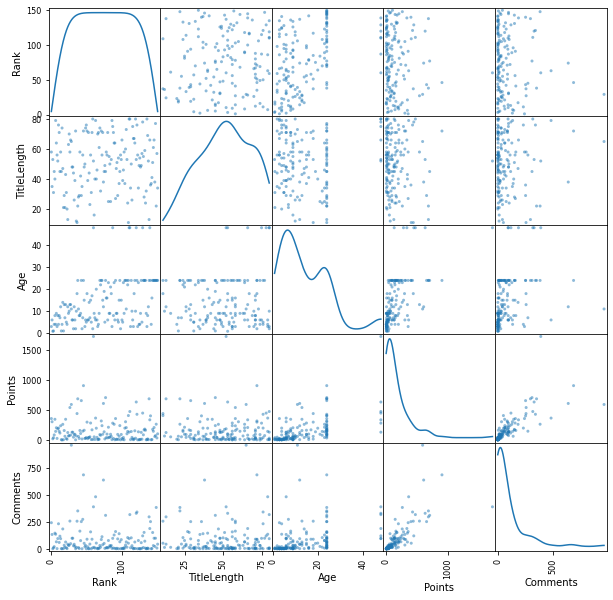

In [10]:
print(mainData.corr())
pd.plotting.scatter_matrix(mainData, figsize=(10, 10), diagonal='kde')
plt.show()

### My insights 

From what I see the only variable that could be loosely having a connection with Ranking is the Age or time variable. In my grafts, there could have been a 1/x relations with time and “Rank” and “Time”   and I think that Time would be your most useful as well. I also dont see any corrlation between the variables other then Comments and Points. With a value of 0.75 there is a slight corrlation but just because you have more of one does not increase the other. 


# part 3 Classification

In [11]:
mainData['frontPage'] = np.where(mainData['Rank']<30, 1,0)
mainData

Rank  TitleLength    Age  Points  Comments  frontPage
0     1.0           58   3.00   356.0     241.0          1
1     2.0           35   6.00   303.0     132.0          1
2     3.0           53   0.85    20.0       0.0          1
3     4.0           31   1.00    38.0       9.0          1
4     5.0           45   4.00    84.0      19.0          1
..    ...          ...    ...     ...       ...        ...
25  146.0           38  24.00    57.0      21.0          0
26  147.0           77  24.00    73.0      97.0          0
27  148.0           22  24.00   262.0     382.0          0
28  149.0           57  24.00    34.0       6.0          0
29  150.0           34  24.00   102.0      42.0          0

[150 rows x 6 columns]

Optimization terminated successfully.
         Current function value: 0.490456
         Iterations 5


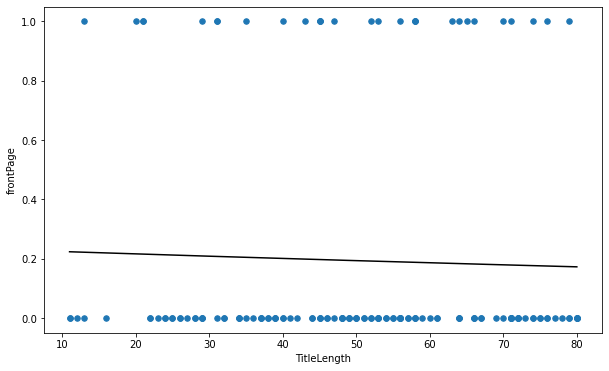

In [14]:
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

page_model = sm.logit(formula="frontPage ~ TitleLength", data=mainData).fit()
page_model.summary()
logistic = lambda x: 1/(1+np.exp(-x))

mainData.plot.scatter(x='TitleLength',y='frontPage',s=30)
x = np.linspace(mainData['TitleLength'].min(),mainData['TitleLength'].max(),1000)
par = dict(page_model.params)
plt.plot(x,logistic(par['Intercept'] + par['TitleLength']*x),color='Black')
plt.show()

Optimization terminated successfully.
         Current function value: 0.422610
         Iterations 7


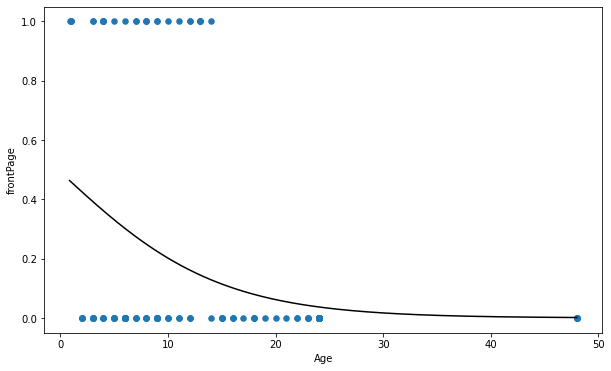

In [15]:
page_model = sm.logit(formula="frontPage ~ Age", data=mainData).fit()
page_model.summary()
logistic = lambda x: 1/(1+np.exp(-x))

mainData.plot.scatter(x='Age',y='frontPage',s=30)
x = np.linspace(mainData['Age'].min(),mainData['Age'].max(),1000)
par = dict(page_model.params)
plt.plot(x,logistic(par['Intercept'] + par['Age']*x),color='Black')
plt.show()

From my two grafts what I can see is that again the best way to get the the front page is having a newer post. The length of the title does not affect getting to the front page really at all. 